In [9]:
# entire code is being run on an Ubuntu kernel. 
# not many QoL libraries are needed.
# your mileage may vary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm

# dataset imports
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from PIL import Image
# from torchvision.transforms import ToTensor, Resize, ToPILImage, Lambda
import torchvision.transforms as transforms
from torchvision.transforms.functional import resize

# AI imports
from segmentation import UNet # importing the segmentation model
from torch.nn import ConvTranspose2d, Conv2d, MaxPool2d, Module, ModuleList
from torch.nn import Sequential, Softmax, CrossEntropyLoss, ReLU, BatchNorm2d
from torch.nn import functional as F
from torchvision.utils import make_grid
import torch


# statistics
from torchinfo import summary
import torchmetrics as TM

# test if GPU acceleration is working
torch.cuda.is_available()

True

In [10]:
# first step here is to load the segmentation model that will be used for inference moving forward.
PATH_TO_MODEL = "../semantic-segmentation/models/model_20231111-201159-checkpoint_20:53.pth"
model = UNet(in_channels=3, out_channels=150)
model.load_state_dict(torch.load(PATH_TO_MODEL)['state_dict'])
model.eval()

UNet(
  (ups): ModuleList(
    (0): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), pad

In [11]:
def close_figures():
    while len(plt.get_fignums()) > 0:
        plt.close()

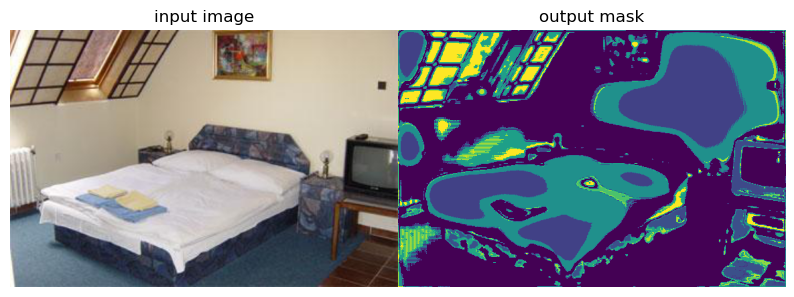

In [16]:
with torch.inference_mode():
    test_image = f"../semantic-segmentation/ade20k/ADEChallengeData2016/images/training/ADE_train_{np.random.randint(1, 2000):08d}.jpg"
    test_image = read_image(test_image)
    lmao = transforms.Compose([transforms.ToPILImage(), transforms.Resize(384), transforms.ToTensor()])
    test_image = lmao(test_image)[None, :, :, :]
    test_seg = model(test_image)
    test_seg = test_seg.argmin(dim=1) + 1
    test_seg = test_seg.unsqueeze(1)
    close_figures()

    fig = plt.figure(figsize=(10, 6))
    fig.add_subplot(1, 2, 1)
    plt.imshow(make_grid(test_image[0].permute(1, 2, 0)))
    plt.title("input image")
    plt.axis("off")
    fig.add_subplot(1, 2, 2)
    plt.imshow(make_grid(test_seg[0].permute(1, 2, 0)))
    plt.title("output mask")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis("off")

In [17]:
test_seg.unique()

tensor([  6,   8,  15,  25,  30,  32,  36,  39,  44,  55,  74,  81,  82,  86,
         87,  98, 103, 113, 119, 126, 127, 141])